In [23]:
import pandas as pd
import numpy as np
from ta.utils import dropna
import ta.trend as ta_trend
import ta.momentum as ta_mmt
import ta.others as ta_other
import ta 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [24]:
ab_path = "../data/SPY-Daily-May23-Prediction.csv"

start_date='2023-01-01'
end_date='2023-12-31'

date_col='Date'
prediction_col='EMA1'
#feature_cols=['SIGNAL']
feature_cols=['EMA1']

In [25]:
df=pd.read_csv(f'{ab_path}',parse_dates=['Date/Time'],dayfirst=True)
df.rename(columns={'Date/Time':date_col},inplace=True)
df.drop(columns=['Ticker'],inplace=True)


df['EMA1']=ta_trend.ema_indicator(close=df['close'],window=10,fillna=True).round(4)
df['MACD']=ta_trend.macd(close=df['close'], window_slow=20, window_fast=10, fillna=True).round(4)
df['SIGNAL']=ta_trend.macd_signal(close=df['close'], window_slow=20, window_fast=10,window_sign=15, fillna=True).round(4)

allCols=list(df.columns)
print(allCols)


df.set_index(date_col,inplace=True)
df=df.loc[start_date:end_date,:]
print(df.info())
df.tail()

df.info()
df.tail(10)

['Date', 'close', 'EMA1', 'MACD', 'SIGNAL']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2023-01-03 to 2023-05-19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   96 non-null     float64
 1   EMA1    96 non-null     float64
 2   MACD    96 non-null     float64
 3   SIGNAL  96 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2023-01-03 to 2023-05-19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   96 non-null     float64
 1   EMA1    96 non-null     float64
 2   MACD    96 non-null     float64
 3   SIGNAL  96 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


,close,EMA1,MACD,SIGNAL
Date,,,,
2023-05-08,412.74,410.8681,0.9471,1.6746
2023-05-09,410.93,410.8793,0.8623,1.5730
2023-05-10,412.85,411.2376,0.9508,1.4953
2023-05-11,412.13,411.3999,0.9375,1.4255
2023-05-12,411.59,411.4344,0.8647,1.3554
2023-05-15,413.01,411.7209,0.9187,1.3008
2023-05-16,410.25,411.4535,0.7039,1.2262
2023-05-17,415.23,412.1401,0.9638,1.1934
2023-05-18,419.23,413.4292,1.4859,1.2300


Text(0, 0.5, 'MACD & Signal')

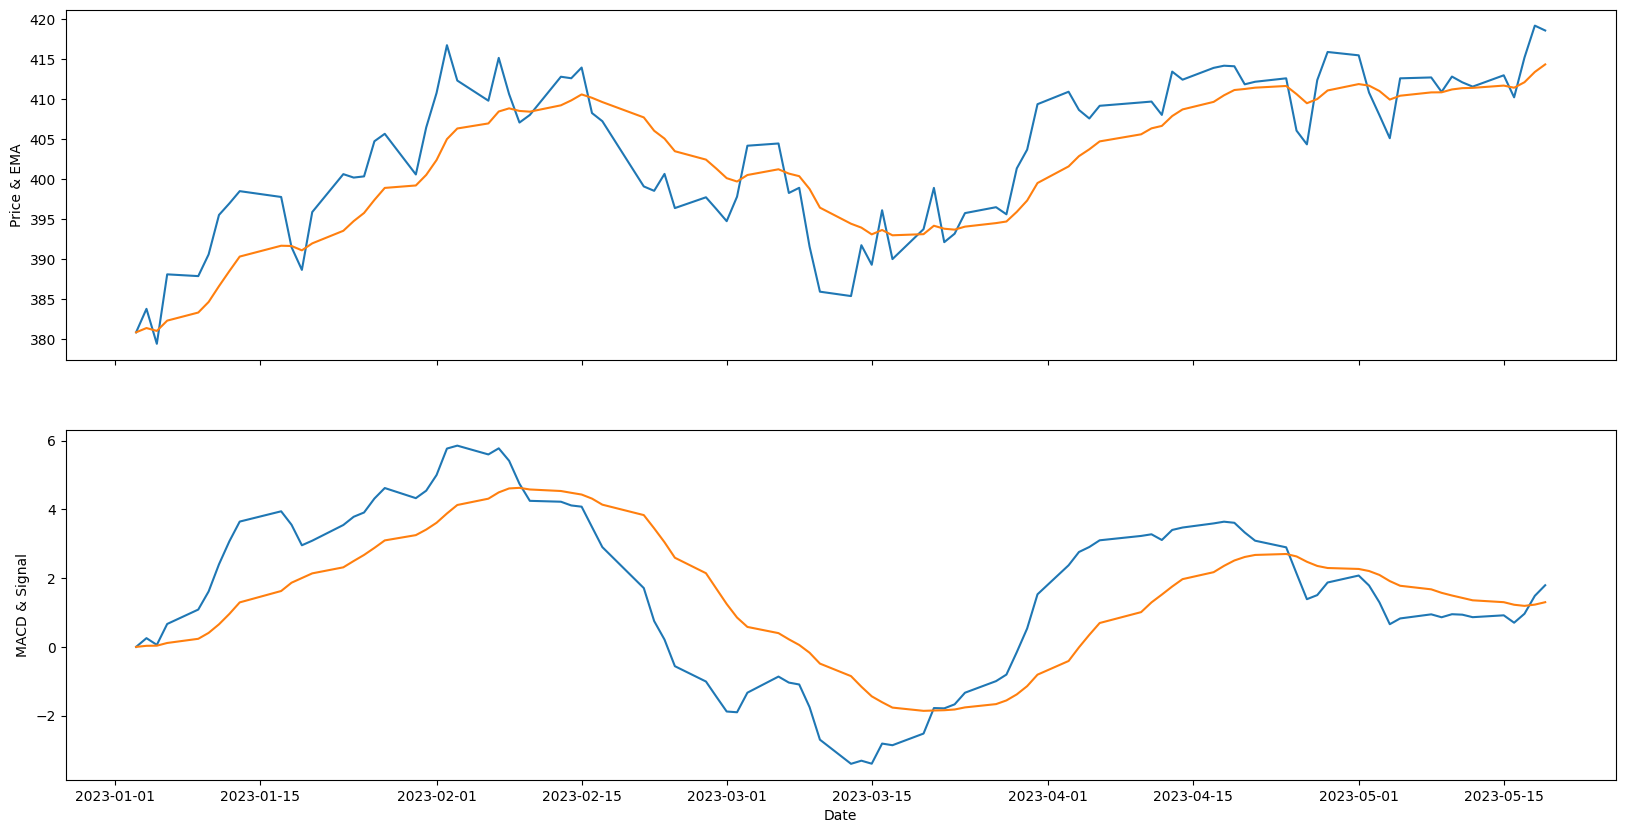

In [31]:
plt.subplots(2, 1, figsize = (20, 10),sharex=True)

ax1 = plt.subplot(2, 1, 1)
plt.plot(df[['close','EMA1']])
plt.ylabel('Price & EMA')

ax2 = plt.subplot(2, 1, 2)
plt.plot(df[['MACD','SIGNAL']])
plt.xlabel('Date')
plt.ylabel('MACD & Signal')


In [18]:
def prepare_data(df):

    # List of considered Features
    FEATURES = feature_cols

    print(f'FEATURE LIST To Predict {prediction_col}')
    print([f for f in FEATURES])

    #Create the dataset with features and filter the data to the list of FEATURES"
    df_filter = df[FEATURES]
    
    print("Convert the data to numpy values")
    np_filter_unscaled = np.array(df_filter)
    np_filter_unscaled = np.reshape(np_filter_unscaled, (df_filter.shape[0], -1))
    print(np_filter_unscaled.shape)
    
    np_c_unscaled = np.array(df[prediction_col]).reshape(-1, 1)
    print(np_c_unscaled.shape)
    
    return np_filter_unscaled, np_c_unscaled

np_filter_unscaled, np_c_unscaled = prepare_data(df)   

FEATURE LIST To Predict EMA1
['EMA1']
Convert the data to numpy values


NameError: name 'np' is not defined